In [21]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


In [22]:
# Define paths
dataset_name = "denkuznetz\\taxi-price-prediction"
download_path = "..\\Data"
zip_path = os.path.join(download_path, f"{os.path.basename(dataset_name)}.zip")
file_path = '..\\Data\\taxi_trip_pricing.csv'

In [23]:
# Load dataset
# The dataset contains realistic synthetic data of taxi trips
if os.path.exists(file_path):
    dataset_df = pd.read_csv(file_path)
else:
    #Dowwload Dataset
    !kaggle datasets download -d {dataset_name} -p {download_path}
    # Unzip dataset
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(download_path)
    dataset_df = pd.read_csv(file_path)

In [24]:
dataset_df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [25]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [26]:
dataset_df[dataset_df.isnull().any(axis=1)]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
...,...,...,...,...,...,...,...,...,...,...,...
991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,NaN
993,NaN,Morning,Weekday,3.0,Medium,Clear,2.65,1.35,NaN,25.61,55.3348
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236


In [27]:
dataset_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


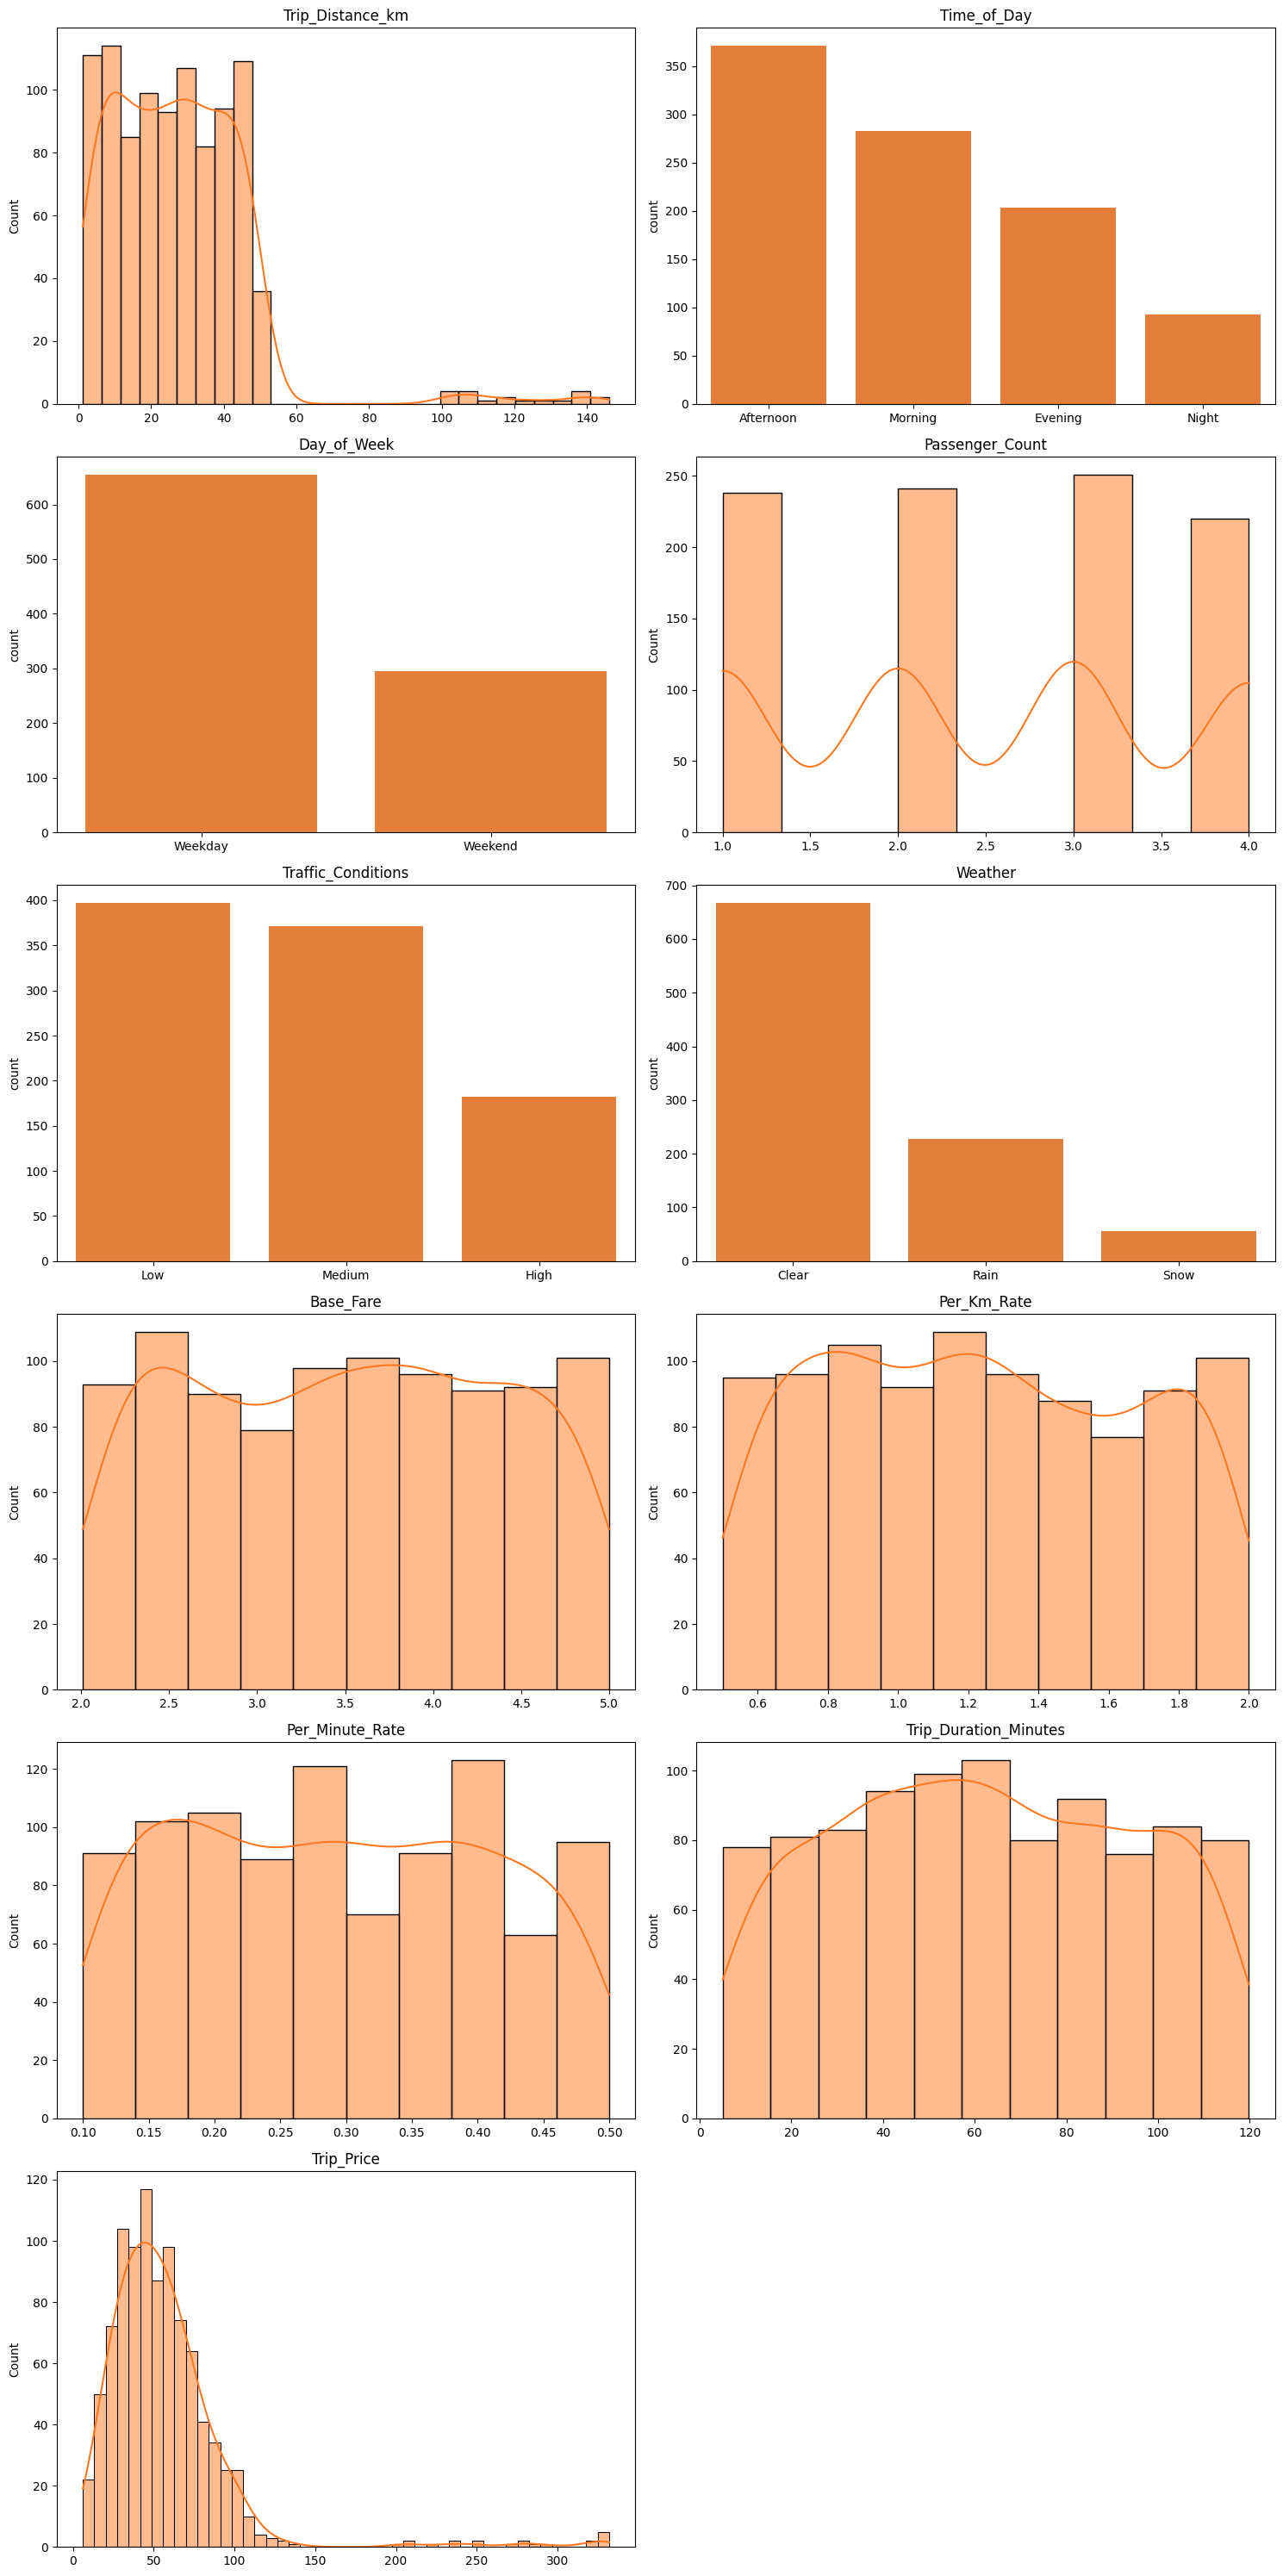

In [28]:
colors = ['#FF781F']

n_cols = 2
n_features = len(dataset_df.columns)
n_rows = math.ceil(n_features / n_cols)

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))
ax = ax.flatten()

for i, col_name in enumerate(dataset_df.columns):

    if not pd.api.types.is_numeric_dtype(dataset_df[col_name]):

        counts = dataset_df[col_name].value_counts().reset_index()
        # counts.columns = [col_name, 'count']

        sns.barplot(
            data=counts,
            x=col_name,
            y='count',
            color=colors[0],
            ax=ax[i]
        )

        # ax[i].tick_params(axis='x', rotation=45)

    else:

        sns.histplot(
            dataset_df[col_name],
            kde=True,
            bins = 'fd', 
            color=colors[0],
            ax=ax[i]
        )

    ax[i].set_title(col_name)
    ax[i].set_xlabel('')

# Hide unused plots
for j in range(n_features, len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA)

## Target Variable: Trip_Price

- Trip Price ranges from **6.13 to 332.04**, with most trips priced between **20 and 120**.
- The distribution is **right-skewed**, indicating a small number of high-price trips.
- A few high-price trips above **200** may represent **long-distance trips rather than data errors**, but this will be confirmed using scatter plots.


---

## Trip Distance

- Trip Distance ranges from **1.23 km to 146.07 km**.
- Most trips occur between **0 and 50 km**.
- A small number of trips between **100 and 150 km** appear as potential outliers.
- These long trips may be valid and are expected to correspond to higher trip prices.
- A strong positive relationship between **Trip Distance and Trip Price is expected**.

---

## Trip Duration

- Trip Duration ranges from **5 to 120 minutes**, with most trips between **30 and 90 minutes**.
- The distribution appears reasonably continuous without abnormal spikes.
- Trip Duration is expected to be an important predictor of Trip Price.

---

## Time of Day

- Trip frequency by time of day (highest to lowest):
  - Afternoon
  - Morning
  - Evening
  - Night

- This suggests higher ride demand during daytime hours.

---

## Day of Week

- More trips occur on **weekdays than weekends**.
- This may indicate commuting patterns driving ride demand.

---

## Passenger Count

- Passenger counts range from **1 to 4 passengers**.
- Distribution is relatively balanced.
- Most common passenger counts (highest to lowest):
  - 3 passengers
  - 2 passengers
  - 1 passenger
  - 4 passengers

- No severe imbalance is present.

---

## Traffic Conditions

- Traffic condition frequency (highest to lowest):
  - Low
  - Medium
  - High

- High traffic conditions occur less frequently.

---

## Weather Conditions

- Weather frequency (highest to lowest):
  - Clear
  - Rain
  - Snow

- Clear weather dominates the dataset.
- Snow conditions are relatively rare.

---

## Base Fare

- Base Fare ranges from **2.01 to 5.00**.
- The distribution appears fairly uniform across this range.
- No abnormal or invalid values detected.

---

## Per Km Rate

- Per Km Rate ranges from **0.50 to 2.00**.
- Values appear evenly distributed across this range.

---

## Per Minute Rate

- Per Minute Rate ranges from **0.10 to 0.50**.
- This represents the time-based pricing component.

---

## Planned Validation: Distance vs Price Relationship
- A scatter plot of **Trip Distance vs Trip Price** will be created to:
  - Confirm that higher prices correspond to longer distances.
  - Identify potential outliers or data entry errors.
  - Verify the expected positive relationship between distance and price.

---

# Key EDA Findings Summary

- Trip Price is right-skewed with a small number of high-value trips.
- Trip Distance is right-skewed with a small number of long
 trips
- Trip Distance and Trip Duration are expected to be strong predictors of Trip Price.
- Potential outliers exist but appear to be valid observations.
- Categorical variables are reasonably balanced with no severe class imbalance.
- Dataset appears clean with no invalid or impossible values.
- No immediate features require removal based on EDA alone.

---

# Next Steps

- Perform correlation analysis to identify strongest predictors.
- Handle missing values if present.
- Encode categorical variables.
- Consider feature scaling if required.
- Train regression models to predict Trip Price.


<Axes: xlabel='Trip_Distance_km', ylabel='Trip_Price'>

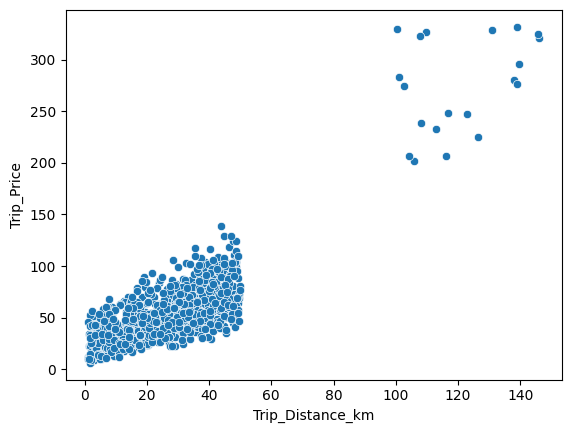

In [29]:
sns.scatterplot(
    data=dataset_df,
    x='Trip_Distance_km',
    y='Trip_Price'
)

The scatter plot of Trip_Distance_km versus Trip_Price shows a clear positive linear relationship. While some trips have unusually high distances and prices, they follow the same trend as the rest of the data and represent valid long-distance trips rather than errors. These values are not true outliers and will be retained to ensure the model learns the full range of pricing behavior.

# Preprocessing

### **Missing Value Summary**

Out of 1000 total rows:

- Most features have 950 non-null values (50 missing, 5%)

- Target variable Trip_Price has 951 non-null values (49 missing, 4.9%)

This is a relatively small amount of missing data, so simple and safe imputation methods are appropriate.

In [30]:
dataset_df = dataset_df.dropna(subset=['Trip_Price']).copy()

Rows with missing Trip_Price were removed because this is the target variable for regression. 
Imputing target values would introduce artificial information and reduce model accuracy.
Only 4.9% of rows were removed, which is small enough to avoid negatively impacting the dataset.


In [31]:
numerical_col = dataset_df.select_dtypes(include='number').drop('Trip_Price', axis=1).columns 

for col in numerical_col:
    dataset_df[col] = dataset_df[col].fillna(dataset_df[col].median())

Missing values in numerical features were filled using the median. 
Median imputation was chosen because it is robust to outliers and preserves the overall distribution better than mean imputation.

In [32]:
category_col = dataset_df.select_dtypes(include='object').columns 

for col in category_col:
    dataset_df[col] = dataset_df[col].fillna(dataset_df[col].mode()[0])

Missing values in categorical features were filled using the mode (most frequent value). 
This preserves valid category labels and avoids introducing artificial categories.

In [33]:
dataset_df.info()
# dataset_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Time_of_Day            951 non-null    object 
 2   Day_of_Week            951 non-null    object 
 3   Passenger_Count        951 non-null    float64
 4   Traffic_Conditions     951 non-null    object 
 5   Weather                951 non-null    object 
 6   Base_Fare              951 non-null    float64
 7   Per_Km_Rate            951 non-null    float64
 8   Per_Minute_Rate        951 non-null    float64
 9   Trip_Duration_Minutes  951 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


# Scatter Plot Analysis: Independent Variables vs Trip Price

Scatter plots were created to examine the relationship between each numerical independent variable and the target variable, `Trip_Price`. This analysis helps verify the linearity assumption required for linear regression and identify the most important predictors.

## How to Interpret Correlation Values

| Correlation (absolute value) | Strength   | 
|------------------------------|------------|
| 0.7 – 1.0                    | Strong     | 
| 0.5 – 0.7                    | Moderate   | 
| 0.3 – 0.5                    | Weak       | 
| 0.0 – 0.3                    | Very weak  | 

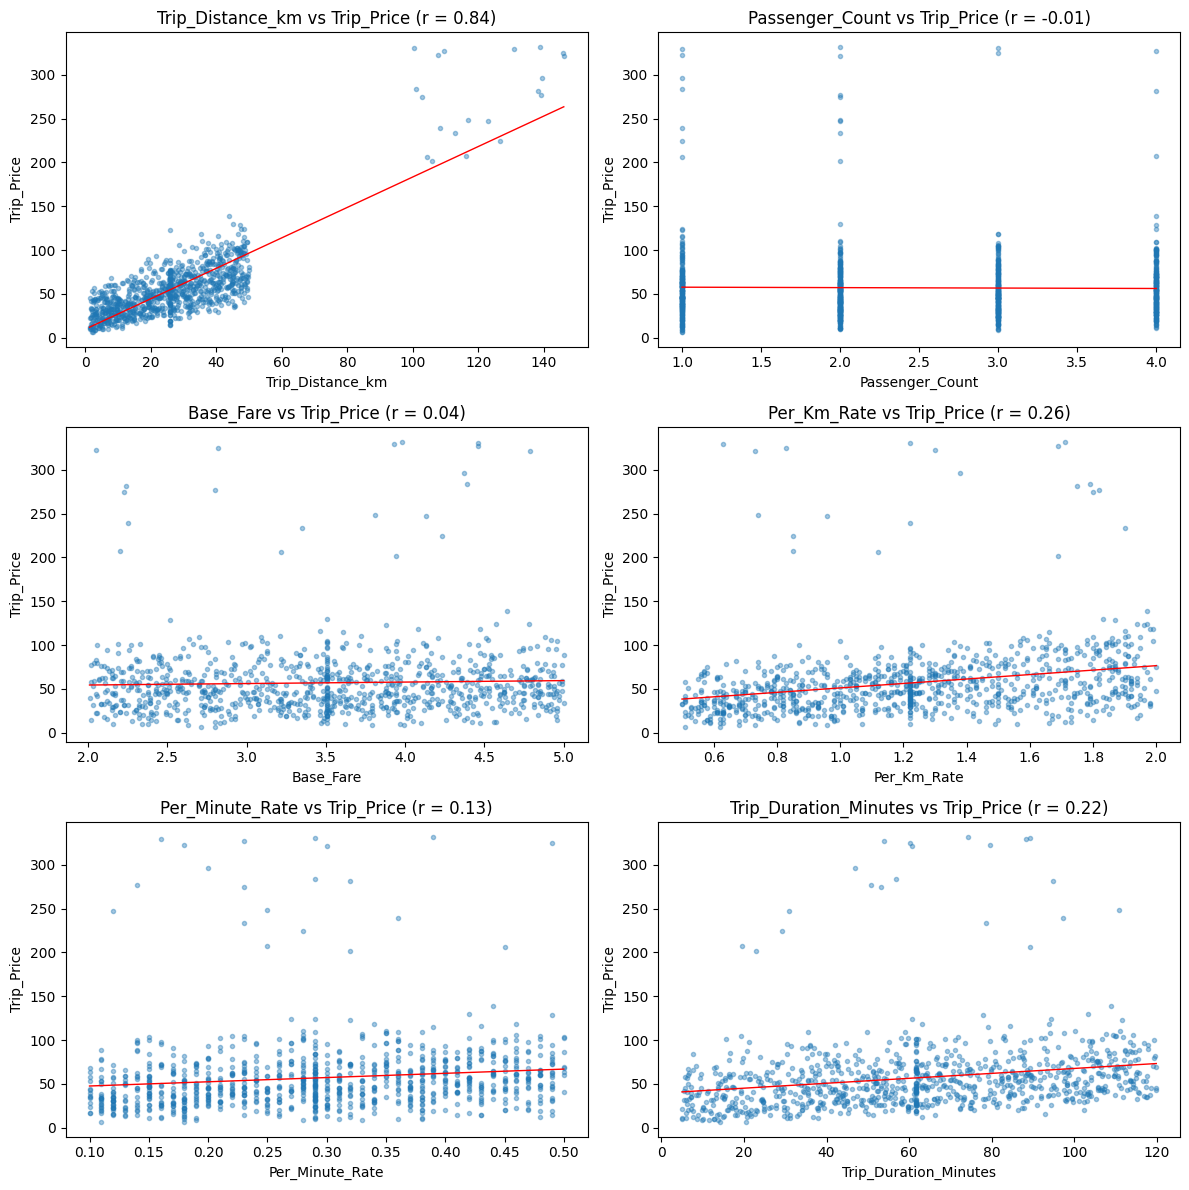

In [34]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(numerical_col):

    corr = dataset_df[col].corr(dataset_df['Trip_Price'])
    
    sns.regplot(
        x=dataset_df[col],
        y=dataset_df['Trip_Price'],
        ax=ax[i],
        marker='.',
        scatter_kws={'alpha': 0.4},
        line_kws={'color': 'red', 'linewidth': 1},
        ci=None   
    )
    
    ax[i].set_title(f'{col} vs Trip_Price (r = {corr:.2f})')


plt.tight_layout()
plt.show()

## Trip Distance vs Trip Price

`Trip_Distance_km` shows a strong positive linear relationship with `Trip_Price`. As trip distance increases, trip price increases proportionally. This is expected because distance directly contributes to the total price through the per-kilometer rate.

This feature appears to be one of the strongest predictors of trip price.

---

## Passenger Count vs Trip Price

`Passenger_Count` shows little to no clear linear relationship with `Trip_Price`. Prices appear similarly distributed across all passenger count values.

This suggests that passenger count may not significantly influence trip price and may be a weaker predictor compared to other features.

---

## Base Fare vs Trip Price

`Base_Fare` shows a weak positive relationship with `Trip_Price`. While higher base fares contribute to higher trip prices, the overall influence is smaller compared to distance and duration.

This feature serves as a fixed starting component in the pricing formula.

---

## Per Km Rate vs Trip Price

`Per_Km_Rate` shows a moderate positive linear relationship with `Trip_Price`. Higher per-kilometer rates generally result in higher trip prices, as expected from the pricing structure.

This feature directly contributes to the variable portion of the trip price and is an important predictor.

---

## Per Minute Rate vs Trip Price

`Per_Minute_Rate` shows a positive relationship with `Trip_Price`, although the relationship is more dispersed compared to distance and duration.

This feature contributes to price calculation but may have slightly less influence compared to trip distance and trip duration.

---

## Trip Duration vs Trip Price

`Trip_Duration_Minutes` shows a clear positive linear relationship with `Trip_Price`. Longer trips tend to result in higher prices, which is consistent with the per-minute pricing component.

This feature is also one of the strongest predictors of trip price.

---

## Overall Conclusion

The scatter plots confirm that several features have linear relationships with the target variable, satisfying a key assumption of linear regression.

The strongest predictors of trip price appear to be:

- Trip_Distance_km  
- Trip_Duration_Minutes  
- Per_Km_Rate  
- Per_Minute_Rate  

Base_Fare has a weaker but still valid relationship, while Passenger_Count appears to have minimal influence on trip price.


In [35]:
# dataset_df.corr(numeric_only=True)['Trip_Price'].sort_values(ascending=False)

label and one hot encode
VIF and Pvalues

In [37]:
custom_order = [['Low', 'Medium', 'High']]

# Create an instance of Labeencoderncoder
encoder = OrdinalEncoder(categories=custom_order)

# Fit and transform the data
encoded_labels = encoder.fit_transform(dataset_df['Traffic_Conditions'])

# Print the encoded labels and the classes found
print("Encoded Labels:", encoded_labels[:5])
print("Classes Found:", encoder.classes_)

# Transform back to original labels (optional)
original_labels = encoder.inverse_transform(encoded_labels)
print("Original Labels:", original_labels[:5])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.